# Helper functions

In [2]:
def split_dir_to_train_test_val(directory = "../data/clothes",
                            train_size = 0.7,
                            test_size = 0.2,
                            val_size = 0.1):
  """
  Creates 3 folders for Train, Test and Validation data
  """
  import os
  import random
  import shutil

  # Set random seed
  rng = random.Random(42)

  for root, folders, files in os.walk(directory):
    for folder in folders:
      # Create list of the files
      list_of_files = []
      for file_name in os.listdir(root+folder+"/"):
        list_of_files.append(file_name)
      
      #  Shuffle the list
      rng.shuffle(list_of_files)

      # Create lists of files
      train_files = list_of_files[:int(len(list_of_files)*train_size)]
      test_files = list_of_files[int(len(list_of_files)*train_size) : int(len(list_of_files)*(train_size+test_size))]
      val_files = list_of_files[int(len(list_of_files)*(train_size+test_size)):]

      # Create folders and files for train data
      for one_file in train_files:
      
        # Copy  files
        dest_dir = "../data/preprocessed/train/"+folder+"/"
        os.makedirs(dest_dir, exist_ok=True)

        shutil.copy2(src=(root+folder+"/"+one_file),
                    dst=(dest_dir+one_file))
      print(f"Folder {folder}. Train data copied. {len(train_files)} files")

      # Create folders and files for test data
      for one_file in test_files:      
        # Copy  files
        dest_dir = "../data/preprocessed/test/"+folder+"/"
        os.makedirs(dest_dir, exist_ok=True)

        shutil.copy2(src=(root+folder+"/"+one_file),
                    dst=(dest_dir+one_file))
      print(f"Folder {folder}. Test data copied. {len(test_files)} files")

      # Create folders and files for validation data
      for one_file in val_files:
      
        # Copy  files
        dest_dir = "../data/preprocessed/validation/"+folder+"/"
        os.makedirs(dest_dir, exist_ok=True)

        shutil.copy2(src=(root+folder+"/"+one_file),
                    dst=(dest_dir+one_file))
      print(f"Folder {folder}. Validation data copied. {len(val_files)} files")
      
     


def get_class_names_from_folder(directory):
  """
  Get the classnames from train folder for example
  """
  import pathlib
  import numpy as np
  data_dir = pathlib.Path(directory)
  class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class names 
  return class_names
  print(class_names)

In [3]:
# Split images to test, train, and validation
split_dir_to_train_test_val(directory='../data/clothes/',
                            train_size=0.7,
                            test_size=0.2,
                            val_size=0.1)

Folder Top. Train data copied. 26 files
Folder Top. Test data copied. 8 files
Folder Top. Validation data copied. 4 files
Folder Skirt. Train data copied. 103 files
Folder Skirt. Test data copied. 30 files
Folder Skirt. Validation data copied. 15 files
Folder Undershirt. Train data copied. 72 files
Folder Undershirt. Test data copied. 20 files
Folder Undershirt. Validation data copied. 11 files
Folder Longsleeve. Train data copied. 462 files
Folder Longsleeve. Test data copied. 132 files
Folder Longsleeve. Validation data copied. 67 files
Folder Dress. Train data copied. 216 files
Folder Dress. Test data copied. 62 files
Folder Dress. Validation data copied. 31 files
Folder Hoodie. Train data copied. 67 files
Folder Hoodie. Test data copied. 20 files
Folder Hoodie. Validation data copied. 10 files
Folder Polo. Train data copied. 80 files
Folder Polo. Test data copied. 23 files
Folder Polo. Validation data copied. 12 files
Folder Pants. Train data copied. 423 files
Folder Pants. Test da

# Get class names from folder

In [4]:
class_names = get_class_names_from_folder(directory="../data/preprocessed/train/")
class_names
len(class_names)

16

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random

In [6]:
def visualize_random_image(target_dir, target_class):
    """
    Visualize random image from target directory
    """
    image_dir = target_dir + target_class
    random_image = random.sample(os.listdir(image_dir), 1)

    img = mpimg.imread(image_dir + '/' + random_image[0])
    plt.title(target_class)
    plt.imshow(img)

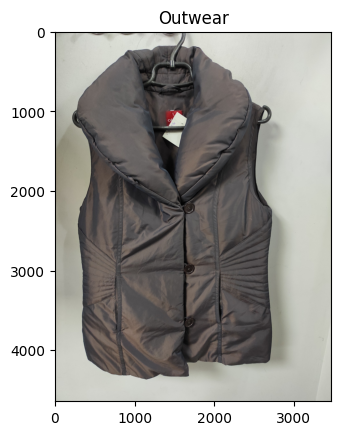

In [30]:
visualize_random_image('../data/preprocessed/test/', 'Outwear')

# Create datasets from directories

In [31]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [59]:
# train_datagen = ImageDataGenerator(rescale=1/255, validation_split=0.2)
# test_datagen = ImageDataGenerator(rescale=1/255)
# val_datagen = ImageDataGenerator(rescale=1/255)

# train_data = train_datagen.flow_from_directory(directory='../data/preprocessed/train',
#                                                target_size=(240,240),
#                                                batch_size=32,
#                                                class_mode='categorical',
#                                                shuffle=True,
#                                                subset='training')

# val_data = val_datagen.flow_from_directory(directory='../data/preprocessed/validation',
#                                                target_size=(240,240),
#                                                batch_size=32,
#                                                class_mode='categorical',
#                                                shuffle=True)


train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '../data/preprocessed/train',
        target_size=(240, 240),
        batch_size=32,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        '../data/preprocessed/validation',
        target_size=(240, 240),
        batch_size=32,
        class_mode='categorical')

test_data = test_datagen.flow_from_directory(directory='../data/preprocessed/test',
                                               target_size=(240,240),
                                               batch_size=32,
                                               class_mode='categorical')

print(f"Number of training samples: {train_data.samples}")
print(f"Number of test samples: {test_data.samples}")
print(f"Number of validation samples: {val_data.samples}")

Found 3249 images belonging to 16 classes.
Found 474 images belonging to 16 classes.
Found 932 images belonging to 16 classes.
Number of training samples: 2606
Number of test samples: 932
Number of validation samples: 474


# Create and fit the model

In [63]:
# Set random seed
tf.random.set_seed(42)

# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Input
# from tensorflow.keras.optimizers import Adam

# # create model
# model = Sequential([
#     Input(shape=(240,240,3)),
#     Conv2D(10, 3, activation="relu"),
#     MaxPool2D(pool_size=2),
#     Conv2D(10, 3, activation="relu"),
#     MaxPool2D(pool_size=2),
#     Flatten(),
#     Dense(16, activation="softmax")
# ])

# model.compile(loss="categorical_crossentropy",
#              optimizer=Adam(),
#              metrics=['accuracy'])

from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam


input_shape = (240, 240, 3)
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(240, 240, 3))
base_model.trainable = False
num_classes = 16
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dense(num_classes, activation='softmax')  # Adjust num_classes based on your dataset
])

model.compile(optimizer=Adam(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [62]:
# steps_per_epoch = train_data.n // train_data.batch_size
# val_steps = val_data.n // val_data.batch_size
steps_per_epoch = (train_data.samples + train_data.batch_size - 1) // train_data.batch_size
val_steps = (val_data.samples + val_data.batch_size - 1) // val_data.batch_size


# Fit the model
history = model.fit(train_data,
                    batch_size=32,
                    epochs=10,
                    steps_per_epoch=len(train_generator),
                    validation_data=val_data,
                    validation_steps=len(validation_generator),
                    callbacks=[tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)])

Epoch 1/10
 82/101 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.1655 - loss: 2.5737

2024-06-29 22:18:40.597424: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


101/101 ━━━━━━━━━━━━━━━━━━━━ 129s 1s/step - accuracy: 0.1706 - loss: 2.5616 - val_accuracy: 0.2098 - val_loss: 2.4384
Epoch 2/10
 82/101 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.2323 - loss: 2.4196

2024-06-29 22:20:41.164293: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


101/101 ━━━━━━━━━━━━━━━━━━━━ 103s 940ms/step - accuracy: 0.2364 - loss: 2.4142 - val_accuracy: 0.3077 - val_loss: 2.4158
Epoch 3/10


2024-06-29 22:20:42.015981: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 82/101 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.2617 - loss: 2.3682

2024-06-29 22:22:25.372879: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


101/101 ━━━━━━━━━━━━━━━━━━━━ 120s 1s/step - accuracy: 0.2633 - loss: 2.3623 - val_accuracy: 0.3013 - val_loss: 2.3083
Epoch 4/10
 82/101 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.2778 - loss: 2.3050

2024-06-29 22:24:23.267256: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


101/101 ━━━━━━━━━━━━━━━━━━━━ 102s 950ms/step - accuracy: 0.2807 - loss: 2.3004 - val_accuracy: 0.3077 - val_loss: 2.5552
Epoch 5/10


2024-06-29 22:24:24.036845: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 82/101 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.3148 - loss: 2.2391

2024-06-29 22:26:01.588301: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


101/101 ━━━━━━━━━━━━━━━━━━━━ 113s 1s/step - accuracy: 0.3146 - loss: 2.2388 - val_accuracy: 0.3616 - val_loss: 2.2249
Epoch 6/10
 82/101 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.3211 - loss: 2.1981

2024-06-29 22:27:56.191580: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


101/101 ━━━━━━━━━━━━━━━━━━━━ 100s 922ms/step - accuracy: 0.3205 - loss: 2.2000 - val_accuracy: 0.4231 - val_loss: 2.2306
Epoch 7/10


2024-06-29 22:27:57.007124: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 82/101 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.3241 - loss: 2.1723

2024-06-29 22:29:32.075785: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


101/101 ━━━━━━━━━━━━━━━━━━━━ 110s 1s/step - accuracy: 0.3235 - loss: 2.1725 - val_accuracy: 0.3192 - val_loss: 2.2051
Epoch 8/10
 82/101 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.3275 - loss: 2.1600

2024-06-29 22:31:22.935168: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


101/101 ━━━━━━━━━━━━━━━━━━━━ 96s 890ms/step - accuracy: 0.3283 - loss: 2.1582 - val_accuracy: 0.3846 - val_loss: 2.2194
Epoch 9/10


2024-06-29 22:31:23.708446: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 82/101 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.3323 - loss: 2.1325

2024-06-29 22:32:55.047860: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


101/101 ━━━━━━━━━━━━━━━━━━━━ 108s 1s/step - accuracy: 0.3356 - loss: 2.1270 - val_accuracy: 0.3772 - val_loss: 2.1249
Epoch 10/10
 82/101 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.3764 - loss: 2.0344

2024-06-29 22:34:50.706570: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


101/101 ━━━━━━━━━━━━━━━━━━━━ 100s 927ms/step - accuracy: 0.3756 - loss: 2.0395 - val_accuracy: 0.4231 - val_loss: 1.8985


2024-06-29 22:34:51.485711: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


In [64]:
# evaluate model
model.evaluate(test_data)

30/30 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.0383 - loss: 2.8225


[2.857501745223999, 0.03862661123275757]

<Axes: >

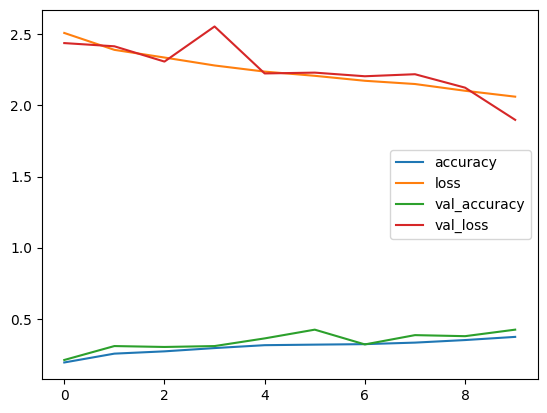

In [65]:
# plot learning curves
import pandas as pd

pd.DataFrame(history.history).plot()

In [26]:
# download image
!wget https://images.squarespace-cdn.com/content/v1/5ef3c9211ce67177992744ae/1594001915710-AN6W6OOS997B07GQCW3D/50+%283%29.jpg

def load_and_resize_image(filename, size):
    img = tf.io.read_file(filename)

    img = tf.image.decode_image(img)

    img = tf.image.resize(img, [size, size])

    img = img / 255

    return img

image = load_and_resize_image('test1.jpg', 240)

--2024-06-29 21:31:20--  https://images.squarespace-cdn.com/content/v1/5ef3c9211ce67177992744ae/1594001915710-AN6W6OOS997B07GQCW3D/50+%283%29.jpg
Resolving images.squarespace-cdn.com (images.squarespace-cdn.com)... 151.101.20.238
Connecting to images.squarespace-cdn.com (images.squarespace-cdn.com)|151.101.20.238|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 346190 (338K) [image/jpeg]
Saving to: ‘50+(3).jpg.3’

50+(3).jpg.3        100%[===================>] 338.08K  --.-KB/s    in 0.04s   

2024-06-29 21:31:20 (8.61 MB/s) - ‘50+(3).jpg.3’ saved [346190/346190]



In [27]:
pred = model.predict(tf.expand_dims(image, axis=0))
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


array([[4.2771194e-07, 1.3053885e-09, 5.1459656e-06, 8.2873776e-06,
        4.1184101e-02, 4.9549642e-01, 4.5833358e-01, 2.2184793e-03,
        4.5664936e-07, 2.4478305e-03, 3.8840381e-06, 8.4236297e-07,
        2.9830833e-04, 6.0662717e-07, 1.5487548e-06, 1.3300996e-07]],
      dtype=float32)

In [28]:
class_names[pred[0].argmax()]

'Longsleeve'

In [93]:
model.save('../models/classify_clothes.keras')

In [2]:
import tensorflowjs as tfjs

In [3]:
tfjs.converters.save_keras_model(model, '../models/')

NameError: name 'model' is not defined